In [4]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep
# C:\Users\elamr\OneDrive\Desktop\edgedriver_win64\msedgedriver.exe

In [5]:
import pandas as pd

In [6]:
class eBayScraper:
    def __init__(self):
        self.base_url = "https://www.ebay.com/sch/i.html"
        self.features = ["title", "price"] # item column names
        self.dataFrame = pd.DataFrame(columns=self.features)

    def search_price(self, search_term, num_pages=1):
        search_term = search_term.replace(" ", "+")
        for page in range(1, num_pages + 1):
            url = f"{self.base_url}?_nkw={search_term}&_pgn={page}"
            items = self._get_items(url)
            self._print_items(items)
            
    def _add_items_df(self, items):
        for item in items:
            title = item.find('div', class_='s-item__title')
            price = item.find('span', class_='s-item__price')
            if title and price:
                self.dataFrame.loc[len(self.dataFrame)] = title.text, price.text
        
    def _get_items(self, url):
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        items = soup.find_all('div', class_='s-item__info clearfix')
        self._add_items_df(items)
        return items

    def _print_items(self, items):
        for item in items:
            title = item.find('div', class_='s-item__title')
            price = item.find('span', class_='s-item__price')
            if title and price:
                print(f'Title: {title.text} | Price: {price.text}')
                
    def _save_to_file(self, items, output_file):
        with open(output_file, 'w', encoding='utf-8') as f:
            for item in items:
                title = item.find('div', class_='s-item__title')
                price = item.find('span', class_='s-item__price')
                if title and price:
                    f.write(f'Title: {title.text} | Price: {price.text}\n')



In [24]:
# Create an instance of the eBayScraper class
scraper = eBayScraper()


# Call the search_price method with the product you want to search
search_term = "dell latitude E7450 i5"
num_pages = 5
scraper.search_price(search_term, num_pages)


# Call the _save_to_file method
items = scraper._get_items(f"{scraper.base_url}?_nkw={search_term.replace(' ', '+')}&_pgn={num_pages}")
scraper._save_to_file(items, "ebay_products.txt")


Title: Shop on eBay | Price: $20.00
Title: Dell Latitude E7450 i5-5300U 2.3GHz 8GB RAM 256GB SSD Win 10 Pro Laptop Grade C | Price: $104.99
Title: Dell Latitude E7450 Intel i5 2.3GHz 8GB RAM 500GB HDD W10 Pro W/Charger | Price: $70.00
Title: Dell Latitude E7450 i5 2.3GHz For Parts READ DESCRIPTION  | Price: $25.00
Title: Dell Latitude E7450 14" HD i5-5300U 2.3GHz 16GB RAM 240GB SSD Windows 10 Laptop | Price: $89.99
Title: Dell Latitude E7450 14" FHD Core i5-5300U 2.30GHz 4GB 256GB MSATA Windows 10 | Price: $59.97
Title: New ListingDell Latitude E7450 Core i5 5300U 2.3GHz 8GB RAM 256GB SSD 14'' No OS Laptop | Price: $24.99
Title: Dell Latitude E7450 Laptop  i5-5300 8G 256G SSD W10p  web cam MICROSOFT #1416 | Price: $70.00
Title: Dell Latitude E7450 Intel i5 5300U 2.30GHz 8GB RAM 256GB SSD 14" Win 10 | Price: $253.40
Title: Dell Latitude E7450 Laptop 14" i5-5300U @ 2.30GHz 256GB SSD 8GB RAM Win 10 (SD) | Price: $193.45
Title: Dell Ultrabook E7450 Core i5-5300u 2.3GHz 16GB 500GB Webcam FH

In [25]:
scraper.dataFrame


,title,price
0,Shop on eBay,$20.00
1,Dell Latitude E7450 i5-5300U 2.3GHz 8GB RAM 25...,$104.99
2,Dell Latitude E7450 Intel i5 2.3GHz 8GB RAM 50...,$70.00
3,Dell Latitude E7450 i5 2.3GHz For Parts READ D...,$25.00
4,"Dell Latitude E7450 14"" HD i5-5300U 2.3GHz 16G...",$89.99
...,...,...
333,"Dell E7450 14"" Laptop 2.3GHz i5-5300U 8GB RAM ...",$143.99
334,"Dell E7450 14"" Laptop 2.3GHz i5-5300U 256GB SS...",$143.99
335,Dell Latitude E7450 i5-5300U 2.30Ghz 8GB RAM 2...,$165.81
336,Dell Latitude E7450 Intel Core i5-5200 500 GB ...,$588.65


In [9]:
str_1 = scraper.dataFrame['title']

In [10]:
str_1

0                                           Shop on eBay
1      Dell Latitude Laptop Computer 3380 13.3" Intel...
2      Dell Latitude 3330 2-in-1 i5-1155G7 8GB RAM 25...
3      Dell Laptop ✅Latitude 14.1" Computer PC Core i...
4      Dell Latitude 7390 Laptop 13" Windows 11 Core ...
                             ...                        
465    Dell Latitude E6440 i7-4600M (8GB RAM, 128 GB ...
466    Dell Latitude 5480 14" Laptop Core i7-7820HQ @...
467    Dell Latitude 14 Rugged 5414 14" | Core i7-660...
468    FAST Dell Latitude  Laptop Intel 4GB 128GB SSD...
469    5 LOT Dell Latitude E7470 (i7-6600u 8GB RAM 25...
Name: title, Length: 470, dtype: object

In [11]:
import re

def parse_title(title):
    product_info = {}

    # Extract product name
    match = re.search(r"(Dell Latitude [0-9]{4})", title)
    if match:
        product_info["product_name"] = match.group(1)

    # Extract screen size
    match = re.search(r"([0-9]{1,2}(?:\.[0-9])?\"|\.[0-9]{1,2}\"|\.[0-9]\"|\d\")", title)
    if match:
        product_info["screen_size"] = match.group(1)

    # Extract RAM size
    match = re.search(r"([0-9]{1,2}GB RAM)", title)
    if match:
        product_info["RAM_size"] = match.group(1)

    # Extract SSD size
    match = re.search(r"([0-9]{1,4}GB SSD|[0-9]{1,2}TB SSD)", title)
    if match:
        product_info["SSD_size"] = match.group(1)

    # Extract CPU type
    match = re.search(r"(i[357]-[0-9]{4,5}[A-Z]?)", title)
    if match:
        product_info["CPU_type"] = match.group(1)

    return product_info


In [12]:
for x in str_1:
    parse_title(x)
    print(parse_title(x))
    

{}
{'screen_size': '13.3"'}
{'product_name': 'Dell Latitude 3330', 'RAM_size': '8GB RAM', 'SSD_size': '256GB SSD', 'CPU_type': 'i5-1155G'}
{'screen_size': '14.1"'}
{'product_name': 'Dell Latitude 7390', 'screen_size': '13"', 'SSD_size': '240GB SSD'}
{'screen_size': '14"', 'RAM_size': '64GB RAM', 'SSD_size': '2TB SSD'}
{'screen_size': '14"'}
{'product_name': 'Dell Latitude 7280', 'screen_size': '12.5"', 'RAM_size': '8GB RAM', 'SSD_size': '500GB SSD'}
{}
{'RAM_size': '16GB RAM'}
{'product_name': 'Dell Latitude 5491', 'screen_size': '15.6"', 'RAM_size': '8GB RAM', 'SSD_size': '256GB SSD', 'CPU_type': 'i5-8300H'}
{'screen_size': '14"'}
{'product_name': 'Dell Latitude 7280', 'screen_size': '12.5"', 'RAM_size': '8GB RAM', 'SSD_size': '500GB SSD'}
{'RAM_size': '16GB RAM'}
{'product_name': 'Dell Latitude 7280', 'screen_size': '12.5"', 'RAM_size': '8GB RAM', 'SSD_size': '500GB SSD'}
{'product_name': 'Dell Latitude 3350', 'screen_size': '13.3"', 'SSD_size': '128GB SSD'}
{'screen_size': '14"', 'R

In [13]:
str_1 = scraper.dataFrame['title']  # Récupération de tous les titres des produits

parsed_data = []  # Liste pour stocker les résultats analysés

for x in str_1:
    parsed_info = parse_title(x)  # Analyse du titre avec la fonction parse_title
    parsed_data.append(parsed_info)

# Conversion de la liste de dictionnaires en DataFrame
df_parsed = pd.DataFrame(parsed_data)

print(df_parsed)


    screen_size        product_name  RAM_size   SSD_size  CPU_type
0           NaN                 NaN       NaN        NaN       NaN
1         13.3"                 NaN       NaN        NaN       NaN
2           NaN  Dell Latitude 3330   8GB RAM  256GB SSD  i5-1155G
3         14.1"                 NaN       NaN        NaN       NaN
4           13"  Dell Latitude 7390       NaN  240GB SSD       NaN
..          ...                 ...       ...        ...       ...
465         NaN                 NaN   8GB RAM        NaN  i7-4600M
466         14"  Dell Latitude 5480  16GB RAM  256GB SSD  i7-7820H
467         14"                 NaN       NaN        NaN  i7-6600U
468         NaN                 NaN       NaN  128GB SSD       NaN
469         NaN                 NaN   8GB RAM  256GB SSD   i7-6600

[470 rows x 5 columns]


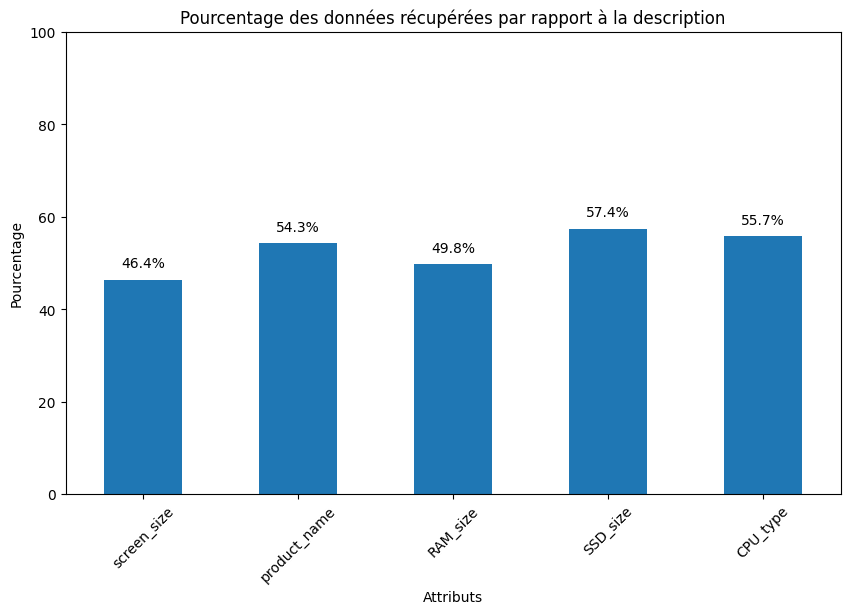

In [14]:
import matplotlib.pyplot as plt

# Calcul du pourcentage de données récupérées par rapport à la description
percentage_data = df_parsed.notnull().sum() / len(df_parsed) * 100

# Création du graphique à barres
plt.figure(figsize=(10, 6))
percentage_data.plot(kind='bar')
plt.title("Pourcentage des données récupérées par rapport à la description")
plt.xlabel("Attributs")
plt.ylabel("Pourcentage")
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Affichage du pourcentage au-dessus de chaque barre
for i, v in enumerate(percentage_data):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', va='bottom')

plt.show()


In [15]:
import spacy
import pandas as pd

# Charger le modèle de langue en français
nlp = spacy.load("fr_core_news_sm")

# Récupérer les titres des produits de votre DataFrame (scraper.dataFrame)
titles = scraper.dataFrame['title']

# Dictionnaire pour stocker les résultats de la reconnaissance d'entités
entities_dict = {"title": [], "entities": []}

# Appliquer la reconnaissance d'entités sur chaque titre
for title in titles:
    doc = nlp(title)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    entities_dict["title"].append(title)
    entities_dict["entities"].append(entities)

# Créer un nouveau DataFrame à partir du dictionnaire des entités
df_entities = pd.DataFrame(entities_dict)

# Afficher le DataFrame des entités
print(df_entities)


                                                 title  \
0                                         Shop on eBay   
1    Dell Latitude Laptop Computer 3380 13.3" Intel...   
2    Dell Latitude 3330 2-in-1 i5-1155G7 8GB RAM 25...   
3    Dell Laptop ✅Latitude 14.1" Computer PC Core i...   
4    Dell Latitude 7390 Laptop 13" Windows 11 Core ...   
..                                                 ...   
465  Dell Latitude E6440 i7-4600M (8GB RAM, 128 GB ...   
466  Dell Latitude 5480 14" Laptop Core i7-7820HQ @...   
467  Dell Latitude 14 Rugged 5414 14" | Core i7-660...   
468  FAST Dell Latitude  Laptop Intel 4GB 128GB SSD...   
469  5 LOT Dell Latitude E7470 (i7-6600u 8GB RAM 25...   

                                              entities  
0                               [(Shop on eBay, MISC)]  
1    [(Dell, ORG), (Laptop Computer, ORG), (GB Ram ...  
2                 [(Dell Latitude, MISC), (RAM, MISC)]  
3    [(Dell Laptop ✅Latitude, MISC), (Computer PC, ...  
4    [(Dell Latitu

In [16]:
# Créer un DataFrame vide pour les entités en colonnes
df_columns = pd.DataFrame()

# Parcourir les lignes du DataFrame des entités
for _, row in df_entities.iterrows():
    # Créer un dictionnaire pour stocker les entités en colonnes pour chaque titre
    entities_dict = {}

    # Parcourir les entités détectées dans chaque titre
    for entity in row['entities']:
        entity_text, entity_label = entity
        # Ajouter l'entité détectée comme colonne dans le dictionnaire
        entities_dict[entity_label] = entity_text

    # Ajouter les entités en colonnes au DataFrame des entités
    df_columns = pd.concat([df_columns, pd.DataFrame(entities_dict, index=[row['title']])])

# Réinitialiser les index du DataFrame des entités en colonnes
df_columns = df_columns.reset_index()

# Afficher le DataFrame des entités en colonnes
print(df_columns)


                                                 index                   MISC  \
0                                         Shop on eBay           Shop on eBay   
1    Dell Latitude Laptop Computer 3380 13.3" Intel...             Windows 10   
2    Dell Latitude 3330 2-in-1 i5-1155G7 8GB RAM 25...                    RAM   
3    Dell Laptop ✅Latitude 14.1" Computer PC Core i...             Windows 10   
4    Dell Latitude 7390 Laptop 13" Windows 11 Core ...                   HDMI   
..                                                 ...                    ...   
465  Dell Latitude E6440 i7-4600M (8GB RAM, 128 GB ...         Windows 10 Pro   
466  Dell Latitude 5480 14" Laptop Core i7-7820HQ @...             GB SSD W10   
467  Dell Latitude 14 Rugged 5414 14" | Core i7-660...                   DDR4   
468  FAST Dell Latitude  Laptop Intel 4GB 128GB SSD...              Intel 4GB   
469  5 LOT Dell Latitude E7470 (i7-6600u 8GB RAM 25...  W/AC Win10Pro C-Grade   

                 ORG       